/usr/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


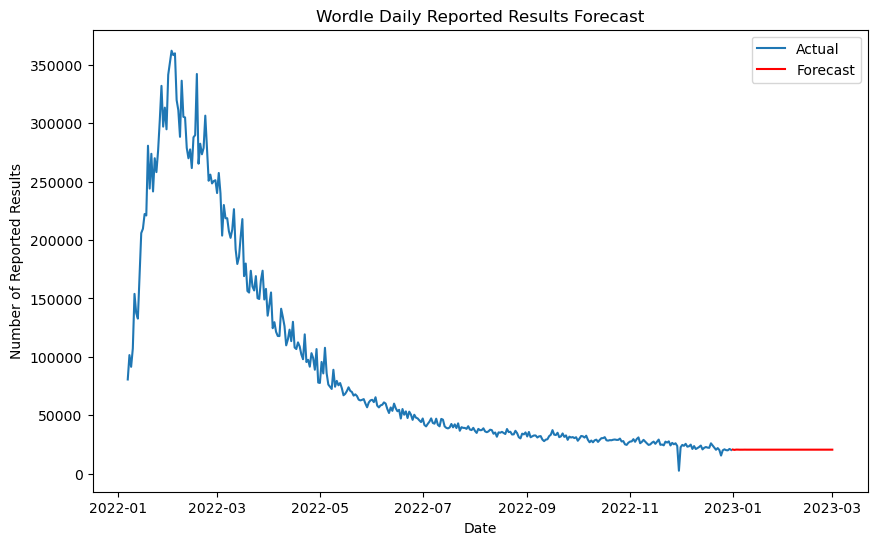

20585.375235281

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from datetime import datetime

# 数据预处理
# 读取数据，跳过第一行（列标题）
wordle_data = pd.read_excel('/home/ebotian/MCM/Problem_C_Data_Wordle.xlsx', skiprows=1)

# 转换日期列为 datetime 类型
wordle_data['Date'] = pd.to_datetime(wordle_data['Date'])

# 确保数据按日期排序
wordle_data.sort_values('Date', inplace=True)

# 提取每日报告结果的数量
daily_reported_results = wordle_data.set_index('Date')['Number of reported results']

# 时间序列分析 - ARIMA模型
# 为简化起见，这里选择一个自动ARIMA模型，自动选择最佳的参数
model = ARIMA(daily_reported_results, order=(5,1,0))
model_fit = model.fit()

# 预测未来的报告结果数量
forecast = model_fit.forecast(steps=60)  # 预测未来60天的数据

# 绘制预测图
plt.figure(figsize=(10,6))
plt.plot(daily_reported_results, label='Actual')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Wordle Daily Reported Results Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Reported Results')
plt.legend()
plt.show()

# 输出预测的特定日期（2023年3月1日）的结果
forecast_date = '2023-03-01'
forecast_value = forecast.get(forecast_date, None)
forecast_value